In [2]:
import pandas as pd
ruta = '../../../data/processed_data/total_atenciones.csv'

df = pd.read_csv(ruta)

In [4]:
df.head()

,Mes,Ano,IdEstablecimiento,GrupoPrestacion,IdRegion,IdComuna,total_pacientes,total_migrantes
0,1,2024,101011,Consulta Medica,15,15101,62.0,0.0
1,1,2024,101030,Consulta Medica,15,15101,586.0,41.0
2,1,2024,101030,Consulta no Medica,15,15101,84.0,1.0
3,1,2024,101100,Consulta Medica,15,15101,586.0,41.0
4,1,2024,101100,Consulta no Medica,15,15101,84.0,1.0


In [5]:
region = 13

df_region=df[df["IdRegion"]==region]

df_region.head()

,Mes,Ano,IdEstablecimiento,GrupoPrestacion,IdRegion,IdComuna,total_pacientes,total_migrantes
788,1,2024,109011,Consulta Medica,13,13108,51.0,0.0
789,1,2024,109030,Consulta Medica,13,13108,377.0,0.0
790,1,2024,109030,Consulta no Medica,13,13108,231.0,0.0
791,1,2024,109104,Consulta Medica,13,13303,592.0,11.0
792,1,2024,109104,Consulta no Medica,13,13303,813.0,10.0


In [11]:
df_stats = (
    df
    .groupby(["IdRegion","IdComuna", "Mes"], as_index=False)
    .agg({
        "total_pacientes": "sum",
        "total_migrantes": "sum"
    })
)
df_stats.head()

,IdRegion,IdComuna,Mes,total_pacientes,total_migrantes
0,1,1101,1,14691.0,2651.0
1,1,1101,2,14370.0,2932.0
2,1,1101,3,15944.0,3274.0
3,1,1101,4,19360.0,4023.0
4,1,1101,5,16217.0,3617.0


In [13]:
df_stats_mean = (
    df_stats
    .groupby(["IdRegion","IdComuna"], as_index=False)
    .agg({
        "total_pacientes": ["mean", "median"],
        "total_migrantes": ["mean", "median"]
    })
)

df_stats_mean.columns = [
    "IdRegion",
    "IdComuna",
    "promedio_pacientes",
    "mediana_pacientes",
    "promedio_migrantes",
    "mediana_migrantes"
]

In [14]:
df_stats_mean.head()

,IdRegion,IdComuna,promedio_pacientes,mediana_pacientes,promedio_migrantes,mediana_migrantes
0,1,1101,14768.083333,14951.5,2964.916667,2950.5
1,1,1107,9143.833333,9362.0,1372.916667,1341.5
2,1,1401,1738.166667,1737.0,222.833333,217.5
3,1,1402,413.916667,401.5,88.166667,95.5
4,1,1403,331.250000,280.5,120.000000,48.5


In [15]:
df_stats_mean["porcentaje_migrantes_promedio"] = (
    df_stats_mean["promedio_migrantes"] / df_stats_mean["promedio_pacientes"] * 100
)
df_stats_mean.head()

,IdRegion,IdComuna,promedio_pacientes,mediana_pacientes,promedio_migrantes,mediana_migrantes,porcentaje_migrantes_promedio
0,1,1101,14768.083333,14951.5,2964.916667,2950.5,20.076516
1,1,1107,9143.833333,9362.0,1372.916667,1341.5,15.014673
2,1,1401,1738.166667,1737.0,222.833333,217.5,12.820021
3,1,1402,413.916667,401.5,88.166667,95.5,21.300584
4,1,1403,331.250000,280.5,120.000000,48.5,36.226415


In [10]:
ruta_comuna = '../../../data/processed_data/codigo_comuna.csv'
df_comuna = pd.read_csv(ruta_comuna)
df_comuna.head()

,Código comuna,Comuna
0,15101,Arica
1,15102,Camarones
2,15201,Putre
3,15202,General Lagos
4,1101,Iquique


In [22]:
df_filtrado = df_stats_mean[df_stats_mean["IdRegion"] == 1]
df_filtrado.head()

,IdRegion,IdComuna,promedio_pacientes,mediana_pacientes,promedio_migrantes,mediana_migrantes,porcentaje_migrantes_promedio
0,1,1101,14768.083333,14951.5,2964.916667,2950.5,20.076516
1,1,1107,9143.833333,9362.0,1372.916667,1341.5,15.014673
2,1,1401,1738.166667,1737.0,222.833333,217.5,12.820021
3,1,1402,413.916667,401.5,88.166667,95.5,21.300584
4,1,1403,331.250000,280.5,120.000000,48.5,36.226415


In [23]:
df_final = df_filtrado.merge(
    df_comuna,  # DataFrame con Código comuna y Comuna
    left_on="IdComuna",
    right_on="Código comuna",
    how="left"
)

df_final = df_final[["Comuna", "porcentaje_migrantes_promedio"]]

In [24]:
df_final

,Comuna,porcentaje_migrantes_promedio
0,Iquique,20.076516
1,Alto Hospicio,15.014673
2,Pozo Almonte,12.820021
3,Camiña,21.300584
4,Colchane,36.226415
5,Huara,23.099773
6,Pica,17.046819


C:\Users\Alan\AppData\Local\Temp\ipykernel_102800\3215295287.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="porcentaje_migrantes_promedio", y="Comuna", data=df_plot, palette="OrRd")


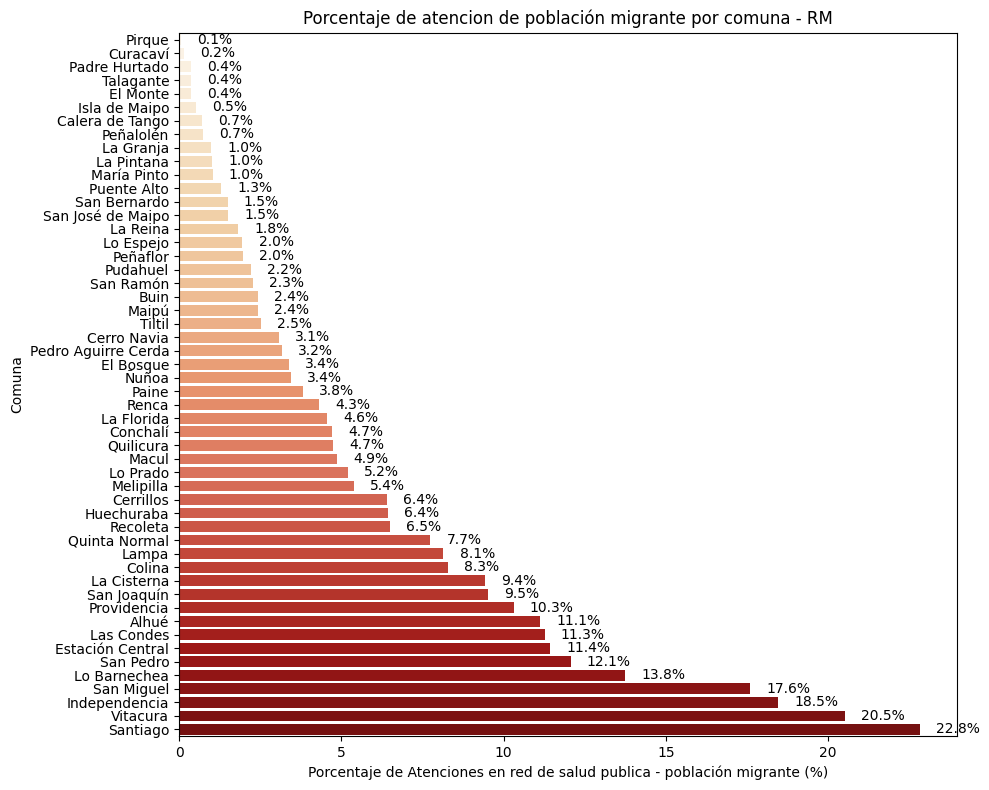

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar comunas por porcentaje
df_plot = df_final.sort_values("porcentaje_migrantes_promedio", ascending=True)



plt.figure(figsize=(10, 8))
sns.barplot(x="porcentaje_migrantes_promedio", y="Comuna", data=df_plot, palette="OrRd")

plt.xlabel("Porcentaje de Atenciones en red de salud publica - población migrante (%)")
plt.ylabel("Comuna")
plt.title("Porcentaje de atencion de población migrante por comuna - RM")

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje_migrantes_promedio"]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

plt.tight_layout()
plt.show()